## Abbildung 1. Wortvektoren der Ländernamen differenziert nach UN-Regionalgruppen (1996-1999)

In [62]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

%matplotlib inline
matplotlib.style.use('seaborn-white')

Laden der UN-Regionalgruppen.

In [63]:
country_groups_df = pd.read_csv("Country_Groups.csv", sep=";", engine="python", encoding="utf-8", names= ["Land","UN_AfricanGroup","UN_AsiaGroup","UN_EastEUGroup","UN_LatinAmerica","UN_WestEuropeGroup","ArabischeLiga","ASEAN","Benelux","BRICS","G4","G8","G8_5","G20","Next11","OPAC","Mercosur","P5","Visegrad"])
country_groups_df.set_index("Land", inplace=True)
country_groups_df.drop("Land",axis=0,inplace=True)
country_groups_df.head()

,UN_AfricanGroup,UN_AsiaGroup,UN_EastEUGroup,UN_LatinAmerica,UN_WestEuropeGroup,ArabischeLiga,ASEAN,Benelux,BRICS,G4,G8,G8_5,G20,Next11,OPAC,Mercosur,P5,Visegrad
Land,,,,,,,,,,,,,,,,,,
afghanistan,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ägypten,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
albanien,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
algerien,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
andorra,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Laden der Wortvektoren, die anhand der Bundestagsreden zwischen den Jahren 1996 bis 1999 gebildet wurde. Als Grundlage dient das "fixedModel", also das Modell, das am originalen, nicht durch bootstrapping veränderten Datensatz trainiert wurde.

In [64]:
vector_df = pd.read_csv(r"Country_Vectors\year1996-1999_fixedModel_CountryVectors.csv")
vector_df.set_index("Country", inplace=True)
vector_df.head()

,Vectordimension_0,Vectordimension_1,Vectordimension_2,Vectordimension_3,Vectordimension_4,Vectordimension_5,Vectordimension_6,Vectordimension_7,Vectordimension_8,Vectordimension_9,...,Vectordimension_290,Vectordimension_291,Vectordimension_292,Vectordimension_293,Vectordimension_294,Vectordimension_295,Vectordimension_296,Vectordimension_297,Vectordimension_298,Vectordimension_299
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,0.053558,-0.057460,0.070017,-0.039772,0.044162,-0.000367,0.003121,-0.032732,0.092648,-0.004396,...,0.088519,-0.070731,0.027065,-0.038740,0.017457,-0.033025,-0.058545,0.073686,-0.019444,-0.092041
ägypten,-0.000237,-0.113569,0.063510,-0.025303,0.022328,-0.011177,0.063001,-0.034022,0.088259,-0.029472,...,0.101099,-0.050718,-0.098086,0.006282,0.099865,0.001289,0.039256,-0.004273,-0.017475,-0.190498
albanien,0.014385,-0.046350,0.052827,-0.026673,0.005334,0.010046,0.069131,0.036719,0.004946,0.001791,...,0.117416,-0.006951,-0.054614,0.043457,-0.010809,0.011361,-0.001976,0.003596,0.074826,-0.052702
algerien,0.026815,0.009564,0.082491,-0.054220,0.049247,0.082527,-0.000571,-0.029966,0.070170,-0.018543,...,0.099459,-0.092021,0.067130,-0.046376,0.033281,-0.008641,-0.064856,-0.063001,-0.017508,-0.013991
angola,0.069849,0.006982,0.130802,-0.086332,0.041687,-0.034243,0.078058,0.038498,-0.002608,-0.067106,...,0.053113,-0.095571,-0.000061,0.011883,0.007009,-0.061061,-0.018543,0.038415,-0.087538,-0.080830


Transformation der Vektoren in zwei Dimensionen mittels UMAP.

In [65]:
embedding = umap.UMAP(random_state=0,metric="cosine").fit_transform(vector_df)
vector_df["X_UMAP"] = list(embedding[:,0])
vector_df["Y_UMAP"] = list(embedding[:,1])

In [66]:
vector_df.iloc[:,300:302].head()

,X_UMAP,Y_UMAP
Country,,
afghanistan,2.017608,1.609436
ägypten,2.463659,1.595238
albanien,0.082251,0.925247
algerien,1.610743,1.202194
angola,1.992825,2.591766


Den einzelnen Ländervektoren werden die UN-Regionalgruppen zugeordnet

In [67]:
for column in country_groups_df.columns:
    groups_list = []
    for index, row in vector_df.iterrows():
        country_name = index
        country_name = country_name.replace("_"," ")
        if country_name in country_groups_df.index:
            group = country_groups_df[country_groups_df.index == country_name][column].values[0]
        else:
            print(country_name)
            group = None
        groups_list.append(group)
    vector_df[column] = groups_list

In [68]:
un_groups = {"UN_AfricanGroup":"Afrika","UN_AsiaGroup":"Asien","UN_EastEUGroup":"Osteuropa","UN_LatinAmerica":"Lateinamerika","UN_WestEuropeGroup":"Westeuropa"}
groups_list = []

for index, row in vector_df.iterrows():
    for group in un_groups:
        if row[group] == 1:
            groups_list.append(un_groups[group])
            
vector_df["UN-Regionalgruppen"] = groups_list

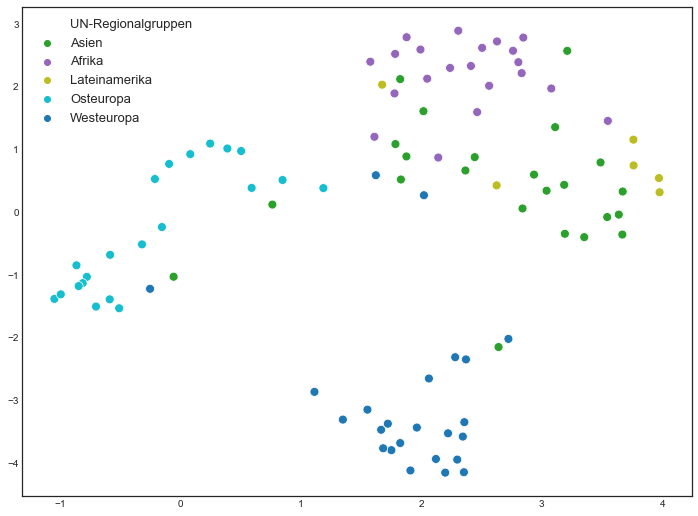

In [69]:
vis_plot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="UN-Regionalgruppen", data=vector_df, s=80, 
                           hue_order = ["Asien", "Afrika", "Lateinamerika","Osteuropa","Westeuropa"], 
                           palette = {"Westeuropa":sns.color_palette()[0],
                                      "Osteuropa": sns.color_palette()[9],
                                      "Asien": sns.color_palette()[2],
                                      "Afrika": sns.color_palette()[4],
                                      "Lateinamerika": sns.color_palette()[8]})
vis_plot.figure.set_size_inches(12,9)
vis_plot.set_xlabel("")
vis_plot.set_ylabel("")
vis_plot.tick_params(labelsize=10)
vis_plot.xaxis.label.set_visible(False)
legend = vis_plot.get_legend()
plt.legend(fontsize=13)

Interaktive Version der obigen Grafik, in der Ländernamen eingeblendet werden können.

In [70]:
un_groups = ["UN_AfricanGroup","UN_AsiaGroup","UN_EastEUGroup","UN_LatinAmerica","UN_WestEuropeGroup"]

vector_df_africa = vector_df[vector_df.UN_AfricanGroup==1]
vector_df_asia = vector_df[vector_df.UN_AsiaGroup==1]
vector_df_easteu = vector_df[vector_df.UN_EastEUGroup==1]
vector_df_latinamerica = vector_df[vector_df.UN_LatinAmerica==1]
vector_df_westeu = vector_df[vector_df.UN_WestEuropeGroup==1]


fig = {
    'data': [
        {
  			'x': vector_df_westeu.X_UMAP, 
        	'y': vector_df_westeu.Y_UMAP, 
        	'text': vector_df_westeu.index, 
        	'mode': 'markers', 
        	'name': 'Westeuropa',
            "textposition":"middle right"},
  		{
  			'x': vector_df_africa.X_UMAP, 
        	'y': vector_df_africa.Y_UMAP, 
        	'text': vector_df_africa.index, 
        	'mode': 'markers', 
        	'name': 'Afrika',
            "textposition":"middle right"},
        {
  			'x': vector_df_easteu.X_UMAP, 
        	'y': vector_df_easteu.Y_UMAP, 
        	'text': vector_df_easteu.index, 
        	'mode': 'markers', 
        	'name': 'Osteuropa',
            "textposition":"middle right"},
      	{
  			'x': vector_df_asia.X_UMAP, 
        	'y': vector_df_asia.Y_UMAP, 
        	'text': vector_df_asia.index, 
        	'mode': 'markers', 
        	'name': 'Asien',
            "textposition":"middle right"},


      	{
  			'x': vector_df_latinamerica.X_UMAP, 
        	'y': vector_df_latinamerica.Y_UMAP, 
        	'text': vector_df_latinamerica.index, 
        	'mode': 'markers', 
        	'name': 'Lateinamerika',
            "textposition":"middle right"},

    ],
    'layout': {
        'xaxis': {'title': 'X_UMAP'},
        'yaxis': {'title': "Y_UMAP"},
        "plot_bgcolor": "rgb(255, 255, 255)",
       # "width": 2000,
        #"height": 1300, #or more
        #"autosize": False
    }
}

plotly.offline.iplot(fig, filename='basic-scatter')

## Abbildung 2 - Wortvektoren der Ländernamen differenziert nach westlichen Identitäten (1996-1999). 

In [10]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go

%matplotlib inline
matplotlib.style.use('seaborn-white')

Laden der Wortvektoren des Wortvektormodells, das anhand der Bundestagsreden zwischen den Jahren 1996 bis 1999 gebildet wurde. Als Grundlage dient das "fixedModel", also das Modell, das am originalen, nicht durch bootstrapping veränderten Datensatz trainiert wurde.

In [11]:
vector_df = pd.read_csv(r"Country_Vectors\year1996-1999_fixedModel_CountryVectors.csv")
vector_df.set_index("Country", inplace=True)
vector_df.head()

,Vectordimension_0,Vectordimension_1,Vectordimension_2,Vectordimension_3,Vectordimension_4,Vectordimension_5,Vectordimension_6,Vectordimension_7,Vectordimension_8,Vectordimension_9,...,Vectordimension_290,Vectordimension_291,Vectordimension_292,Vectordimension_293,Vectordimension_294,Vectordimension_295,Vectordimension_296,Vectordimension_297,Vectordimension_298,Vectordimension_299
Country,,,,,,,,,,,,,,,,,,,,,
afghanistan,0.053558,-0.057460,0.070017,-0.039772,0.044162,-0.000367,0.003121,-0.032732,0.092648,-0.004396,...,0.088519,-0.070731,0.027065,-0.038740,0.017457,-0.033025,-0.058545,0.073686,-0.019444,-0.092041
ägypten,-0.000237,-0.113569,0.063510,-0.025303,0.022328,-0.011177,0.063001,-0.034022,0.088259,-0.029472,...,0.101099,-0.050718,-0.098086,0.006282,0.099865,0.001289,0.039256,-0.004273,-0.017475,-0.190498
albanien,0.014385,-0.046350,0.052827,-0.026673,0.005334,0.010046,0.069131,0.036719,0.004946,0.001791,...,0.117416,-0.006951,-0.054614,0.043457,-0.010809,0.011361,-0.001976,0.003596,0.074826,-0.052702
algerien,0.026815,0.009564,0.082491,-0.054220,0.049247,0.082527,-0.000571,-0.029966,0.070170,-0.018543,...,0.099459,-0.092021,0.067130,-0.046376,0.033281,-0.008641,-0.064856,-0.063001,-0.017508,-0.013991
angola,0.069849,0.006982,0.130802,-0.086332,0.041687,-0.034243,0.078058,0.038498,-0.002608,-0.067106,...,0.053113,-0.095571,-0.000061,0.011883,0.007009,-0.061061,-0.018543,0.038415,-0.087538,-0.080830


Transformation der Vektoren in zwei Dimensionen mittels UMAP.

In [12]:
embedding = umap.UMAP(random_state=0,metric="cosine").fit_transform(vector_df)
vector_df["X_UMAP"] = list(embedding[:,0])
vector_df["Y_UMAP"] = list(embedding[:,1])

In [13]:
vector_df.iloc[:,300:302].head()

,X_UMAP,Y_UMAP
Country,,
afghanistan,2.017608,1.609436
ägypten,2.463659,1.595238
albanien,0.082251,0.925247
algerien,1.610743,1.202194
angola,1.992825,2.591766


Definition der einzelnen westlichen Identitäten

In [14]:
core_west = ["belgien","dänemark","frankreich","island","italien","kanada","luxemburg",
             "niederlande","norwegen","portugal","spanien","vereinigtes_königreich","usa"]


huntington = ["australien","estland","finnland","irland",
              "kroatien","lettland","litauen","neuseeland",
              "österreich","papua_neuguinea","polen","schweden",
              "schweiz","slowakei","slowenien","tschechien","ungarn"]


free_world = ["angola","australien","griechenland","irland",
              "israel","japan","mozambique","namibia","neuseeland","papua_neuguinea","philippinen",
              "südafrika","südkorea","taiwan","thailand","türkei","zypern"]

civic_union = ["japan","finnland","irland","österreich","schweden","schweiz","griechenland"]

nato = ["belgien", "dänemark", "frankreich","island","italien", "kanada","luxemburg","niederlande",
        "norwegen","portugal","vereinigtes_königreich","usa", "griechenland","türkei","spanien"]

Die Ländervektoren werden den unterschiedlichen westlichen Identitäten zugeordnet.

In [15]:
groups_list = []

for index, row in vector_df.iterrows():
    if index in core_west + huntington:
        groups_list.append("Ja")
    else:
        groups_list.append("Nein")
            
vector_df["Westliche Zivilsation (Huntington)"] = groups_list

In [16]:
groups_list = []

for index, row in vector_df.iterrows():
    if index in core_west + free_world:
        groups_list.append("Ja")
    else:
        groups_list.append("Nein")
            
vector_df["Freie Welt"] = groups_list

In [17]:
groups_list = []

for index, row in vector_df.iterrows():
    if index in core_west + civic_union:
        groups_list.append("Ja")
    else:
        groups_list.append("Nein")
            
vector_df["Civic Union"] = groups_list

In [18]:
groups_list = []

for index, row in vector_df.iterrows():
    if index in nato:
        groups_list.append("Ja")
    else:
        groups_list.append("Nein")
            
vector_df["NATO"] = groups_list

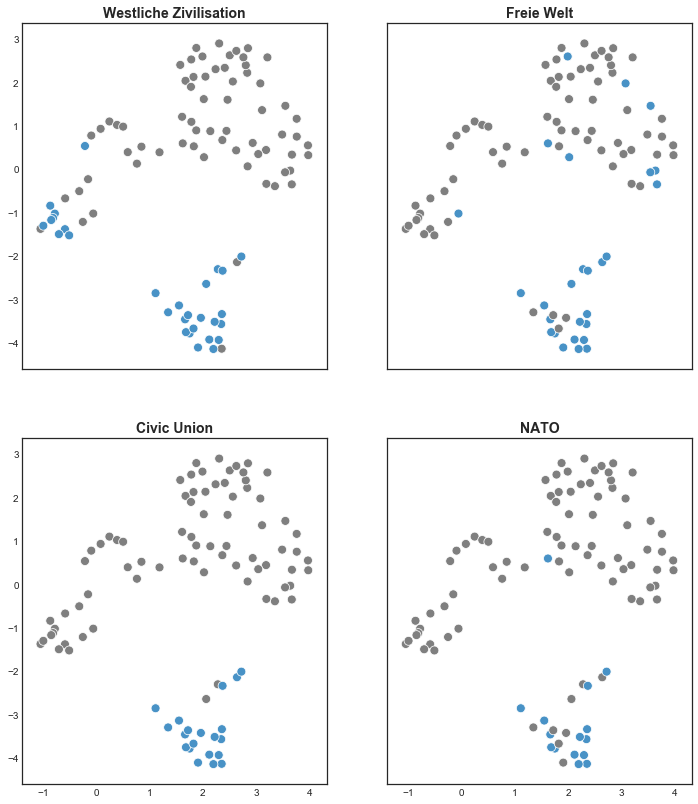

In [19]:
fig, ax = plt.subplots(2,2,sharex=True, sharey=True)


barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="Westliche Zivilsation (Huntington)", data=vector_df, s=80,
                            palette = {"Ja":sns.color_palette("Blues_d")[3],
                                       "Nein": sns.color_palette()[7]}, ax=ax[0,0])
barplot.figure.set_size_inches(12,14)
barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Westliche Zivilisation", weight="bold", size=14)
barplot.get_legend().set_visible(False)


barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="Freie Welt", data=vector_df, s=80,
                            palette = {"Ja":sns.color_palette("Blues_d")[3],
                                       "Nein": sns.color_palette()[7]}, ax=ax[0,1])
barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Freie Welt", weight="bold", size=14)
barplot.get_legend().set_visible(False)


barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="Civic Union", data=vector_df, s=80,
                            palette = {"Ja":sns.color_palette("Blues_d")[3],
                                       "Nein": sns.color_palette()[7]}, ax=ax[1,0])
barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Civic Union", weight="bold", size=14)
barplot.get_legend().set_visible(False)


barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="NATO", data=vector_df, s=80,
                            palette = {"Ja":sns.color_palette("Blues_d")[3],
                                       "Nein": sns.color_palette()[7]}, ax=ax[1,1])
barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("NATO", weight="bold", size=14)
barplot.get_legend().set_visible(False)

## Abbildung 3 – Ähnlichkeit zwischen Arten westlicher Identität und geclusterten Ländervektoren (1996-1999)

In [20]:
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

matplotlib.style.use('seaborn-white')

Laden der Cluster des Modellzeitraums 1996-1999 in ein dictionary.

In [21]:
cluster_dict = {}

for bootstrap_iteration in range(0,25):
    cluster_dict[bootstrap_iteration] = {}
    cluster_df = pd.read_csv(r"Country_Vectors_Cluster\year1996-1999_bootstrappingIteration{}_CountryVectors_Cluster.csv".format(bootstrap_iteration))
    for index, cluster in enumerate(cluster_df.columns):
        cluster_dict[bootstrap_iteration][index] = list(cluster_df[cluster].dropna())
        

Definition der einzelnen westlichen Identitäten

In [22]:
core_west = ["belgien","dänemark","frankreich","island","italien","kanada","luxemburg",
             "niederlande","norwegen","portugal","spanien","vereinigtes_königreich","usa"]


huntington = ["australien","estland","finnland","irland",
              "kroatien","lettland","litauen","neuseeland",
              "österreich","papua_neuguinea","polen","schweden",
              "schweiz","slowakei","slowenien","tschechien","ungarn"]


free_world = ["angola","australien","griechenland","irland",
              "israel","japan","mozambique","namibia","neuseeland","papua_neuguinea","philippinen",
              "südafrika","südkorea","taiwan","thailand","türkei","zypern"]

civic_union = ["japan","finnland","irland","österreich","schweden","schweiz","griechenland"]

nato = ["belgien", "dänemark", "frankreich","italien", "kanada","luxemburg","niederlande",
        "norwegen","portugal","vereinigtes_königreich","usa", "griechenland","türkei","spanien"]

In [23]:
western_identities = {"Westliche Zivilsation": huntington, "Freie Welt": free_world, "Civic Union": civic_union, "NATO": nato}

Vergleich der automatisch gebildeten Cluster mit den vier verschiedenen Listen westlicher Identitäten. Final gespeichert wird immer die Jaccard-Distanz zum ähnlichsten automatischen Cluster.

In [24]:
stability_dict = {"Stability":[],"Westen":[],"Bootstrap_Iteration": []}

for identity in western_identities:
    west_cluster = western_identities[identity] + core_west
    for bootstrap_iteration in range(0,25):
        final_distance = 1
        final_compare_cluster = []
        for cluster_number_compare in cluster_dict[bootstrap_iteration]:
            compare_cluster = cluster_dict[bootstrap_iteration][cluster_number_compare]
            compare_distance = nltk.jaccard_distance(set(west_cluster), set(compare_cluster))
            if compare_distance < final_distance:
                final_distance =  compare_distance
                final_compare_cluster = compare_cluster
        stability_dict["Stability"].append(final_distance)
        stability_dict["Westen"].append(identity)
        stability_dict["Bootstrap_Iteration"].append(bootstrap_iteration)
        
stability_df = pd.DataFrame.from_dict(stability_dict)

In [25]:
stability_df.head()

,Stability,Westen,Bootstrap_Iteration
0,0.428571,Westliche Zivilsation,0
1,0.393939,Westliche Zivilsation,1
2,0.444444,Westliche Zivilsation,2
3,0.393939,Westliche Zivilsation,3
4,0.411765,Westliche Zivilsation,4


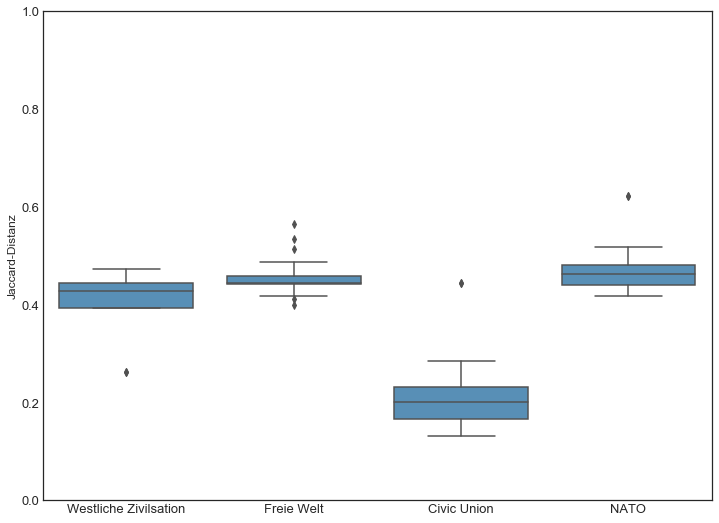

In [26]:
vis_plot = sns.boxplot(x = "Westen", y = "Stability", data=stability_df,color=sns.color_palette("Blues_d")[3])
vis_plot.figure.set_size_inches(12,9)
vis_plot.set(ylim=(0, 1))
vis_plot.set_xlabel("")
vis_plot.set_ylabel("Jaccard-Distanz",size=12)
vis_plot.tick_params(labelsize=13)
vis_plot.xaxis.label.set_visible(False)

## Abbildung 4 – Die Stabilität des West-Clusters im Zeitverlauf

Laden der Cluster aller Modellzeiträume in ein dictionary.

In [27]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.style.use('seaborn-white')

In [28]:
cluster_dict = {}

for year in range(1996,2014):
    cluster_dict[year] = {}
    for bootstrap_iteration in range(0,25):
        cluster_dict[year][bootstrap_iteration] = {}
        cluster_df = pd.read_csv(r"Country_Vectors_Cluster\year{}-{}_bootstrappingIteration{}_CountryVectors_Cluster.csv".format(year,year+3,bootstrap_iteration))
        for index, cluster in enumerate(cluster_df.columns):
            cluster_dict[year][bootstrap_iteration][index] = list(cluster_df[cluster].dropna())


Definition der civic union Identität, nun mit Australien und Neuseeland ergänzt.

In [29]:
core_west = ["belgien","dänemark","frankreich","island","italien","kanada","luxemburg",
             "niederlande","norwegen","portugal","spanien","vereinigtes_königreich","usa"]


civic_union = ["japan","finnland","irland","österreich","schweden","schweiz","griechenland"] + ["australien","neuseeland"]

In [30]:
stability_dict = {"Stability":[],"Westen":[],"Bootstrap_Iteration": [], "Year": []}

west_cluster = civic_union + core_west

for year in range(1996,2014):
    for bootstrap_iteration in range(0,25):
        final_distance = 1
        final_compare_cluster = []
        for cluster_number_compare in cluster_dict[year][bootstrap_iteration]:
            compare_cluster = cluster_dict[year][bootstrap_iteration][cluster_number_compare]
            compare_distance = nltk.jaccard_distance(set(west_cluster), set(compare_cluster))
            if compare_distance < final_distance:
                final_distance =  compare_distance
                final_compare_cluster = compare_cluster
        stability_dict["Stability"].append(final_distance)
        stability_dict["Westen"].append("Civic Union")
        stability_dict["Bootstrap_Iteration"].append(bootstrap_iteration)
        stability_dict["Year"].append(year)
        
stability_df = pd.DataFrame.from_dict(stability_dict)

In [31]:
stability_df.head()

,Stability,Westen,Bootstrap_Iteration,Year
0,0.120000,Civic Union,0,1996
1,0.043478,Civic Union,1,1996
2,0.153846,Civic Union,2,1996
3,0.043478,Civic Union,3,1996
4,0.083333,Civic Union,4,1996


[[<matplotlib.axis.XTick at 0x247d431fe80>,
 [Text(0, 0, '97-00'),
  Text(0, 0, '99-02'),
  Text(0, 0, '01-04'),
  Text(0, 0, '03-06'),
  Text(0, 0, '05-08'),
  Text(0, 0, '07-10'),
  Text(0, 0, '09-12'),
  Text(0, 0, '11-14'),
  Text(0, 0, '13-16')]]

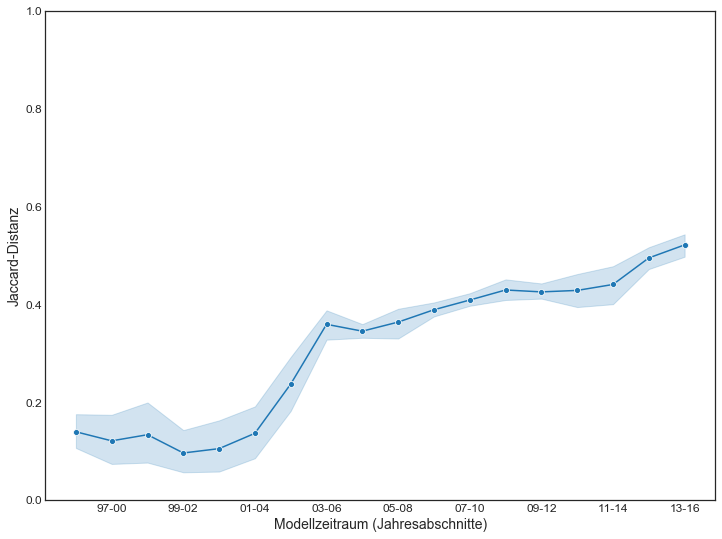

In [32]:
stability_df['Year_Str'] = stability_df['Year'].astype(str)

vis_plot = sns.lineplot(y = "Stability" , x= "Year" , data= stability_df, palette = sns.color_palette()[0], marker="o")
vis_plot.set_ylim(0,1)
vis_plot.set_xlabel("Modellzeitraum (Jahresabschnitte)", size=14)
vis_plot.set_ylabel("Jaccard-Distanz", size=14)
vis_plot.figure.set_size_inches(12,9)
vis_plot.tick_params(labelsize=12)



a = []
for timespan in range(1997,2014,2):
    timespan_string = "{}-{}".format(str(timespan)[2:], str(timespan + 3)[2:])
    a.append(timespan_string)

pos = [year for year in range(1997,2014,2)]
vis_plot.set(xticks=pos, xticklabels=a)

## Abbildung 5-7 – Staaten die Teil des West-Clusters sind

In [34]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter

%matplotlib inline

matplotlib.style.use('seaborn-white')

In [35]:
cluster_dict = {}

for year in range(1996,2014):
    cluster_dict[year] = {}
    for bootstrap_iteration in range(0,25):
        cluster_dict[year][bootstrap_iteration] = {}
        cluster_df = pd.read_csv(r"Country_Vectors_Cluster\year{}-{}_bootstrappingIteration{}_CountryVectors_Cluster.csv".format(year,year+3,bootstrap_iteration))
        for index, cluster in enumerate(cluster_df.columns):
            cluster_dict[year][bootstrap_iteration][index] = list(cluster_df[cluster].dropna())


Definition der civic union Identität, nun mit Australien und Neuseeland ergänzt.

In [36]:
core_west = ["belgien","dänemark","frankreich","island","italien","kanada","luxemburg",
             "niederlande","norwegen","portugal","spanien","vereinigtes_königreich","usa"]


civic_union = ["japan","finnland","irland","österreich","schweden","schweiz","griechenland"] + ["australien","neuseeland"]

### Abbildung 5

In [37]:
counter_countries = Counter()

west_cluster = civic_union + core_west

for year in range(1996,2002):
    for bootstrap_iteration in range(0,25):
        final_distance = 1
        final_compare_cluster = []
        for cluster_number_compare in cluster_dict[year][bootstrap_iteration]:
            compare_cluster = cluster_dict[year][bootstrap_iteration][cluster_number_compare]
            compare_distance = nltk.jaccard_distance(set(west_cluster), set(compare_cluster))
            if compare_distance < final_distance:
                final_distance =  compare_distance
                final_compare_cluster = compare_cluster
        counter_countries.update(final_compare_cluster)
        
percentage_dict = {country: counter_countries[country] / 150 for country in counter_countries}   
percentage_df = pd.DataFrame.from_dict(percentage_dict, orient="index")
percentage_df.head()

,0
argentinien,0.200000
australien,0.986667
belgien,1.000000
dänemark,1.000000
finnland,1.000000


In [38]:
group_list = []

for index, row in percentage_df.iterrows():
    if index in west_cluster:
        group_list.append("Civic Union")
    else:
        group_list.append("")
        
percentage_df["West_Cluster"] = group_list

In [39]:
percentage_df.index = [  " ".join([country_name.capitalize() for country_name in country.split("_")]) for country in percentage_df.index]
percentage_df.reset_index(inplace=True)
percentage_df.columns = ["Land","Clusterzugehörigkeit_Percentage","West_Cluster"]
percentage_df.sort_values("Clusterzugehörigkeit_Percentage",inplace=True, ascending=False)
percentage_df.head()

,Land,Clusterzugehörigkeit_Percentage,West_Cluster
21,Spanien,1.0,Civic Union
10,Italien,1.0,Civic Union
17,Österreich,1.0,Civic Union
16,Norwegen,1.0,Civic Union
15,Niederlande,1.0,Civic Union


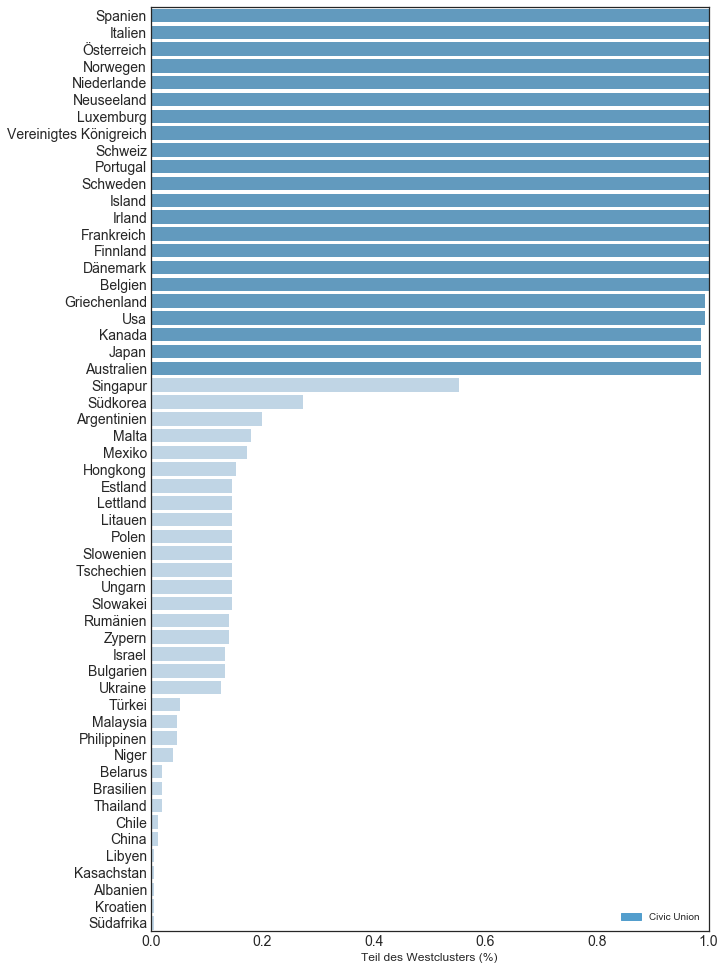

In [40]:
vis_plot = sns.barplot(y="Land", x="Clusterzugehörigkeit_Percentage", 
                       data=percentage_df,
                       palette = [sns.color_palette("Blues")[3] if group == "Civic Union" else sns.color_palette("Blues")[1] for group in percentage_df["West_Cluster"]],
                      )

            
            
#vis_plot = sns.barplot(y="Land", x="Clusterzugehörigkeit_Percentage", 
                       #data=episode_1_df,
                       #color = sns.color_palette("Blues")[3])

        
vis_plot.figure.set_size_inches(10,17)
vis_plot.set_xlabel("Teil des Westclusters (%)",size = 12)
vis_plot.set_ylabel("")
vis_plot.tick_params(labelsize=14)
vis_plot.set_xlim(0,1)
#xmin, xmax = timeline_plot.get_xlim()
#vis_plot.xaxis.label.set_visible(False)
red_patch = mpatches.Patch(color=sns.color_palette("Blues")[3], label='Civic Union')
plt.legend(handles=[red_patch], loc="lower right")


### Abbildung 6

In [41]:
counter_countries = Counter()

west_cluster = civic_union + core_west

for year in range(2003,2012):
    for bootstrap_iteration in range(0,25):
        final_distance = 1
        final_compare_cluster = []
        for cluster_number_compare in cluster_dict[year][bootstrap_iteration]:
            compare_cluster = cluster_dict[year][bootstrap_iteration][cluster_number_compare]
            compare_distance = nltk.jaccard_distance(set(west_cluster), set(compare_cluster))
            if compare_distance < final_distance:
                final_distance =  compare_distance
                final_compare_cluster = compare_cluster
        counter_countries.update(final_compare_cluster)
        
percentage_dict = {country: counter_countries[country] / 225 for country in counter_countries}   
percentage_df = pd.DataFrame.from_dict(percentage_dict, orient="index")
percentage_df.head()

,0
australien,0.888889
belgien,1.000000
dänemark,1.000000
estland,0.973333
finnland,1.000000


In [42]:
group_list = []

for index, row in percentage_df.iterrows():
    if index in west_cluster:
        group_list.append("Civic Union")
    else:
        group_list.append("")
        
percentage_df["West_Cluster"] = group_list

In [43]:
percentage_df.index = [  " ".join([country_name.capitalize() for country_name in country.split("_")]) for country in percentage_df.index]
percentage_df.reset_index(inplace=True)
percentage_df.columns = ["Land","Clusterzugehörigkeit_Percentage","West_Cluster"]
percentage_df.sort_values("Clusterzugehörigkeit_Percentage",inplace=True, ascending=False)
percentage_df.head()

,Land,Clusterzugehörigkeit_Percentage,West_Cluster
14,Luxemburg,1.0,Civic Union
1,Belgien,1.0,Civic Union
19,Österreich,1.0,Civic Union
18,Norwegen,1.0,Civic Union
17,Niederlande,1.0,Civic Union


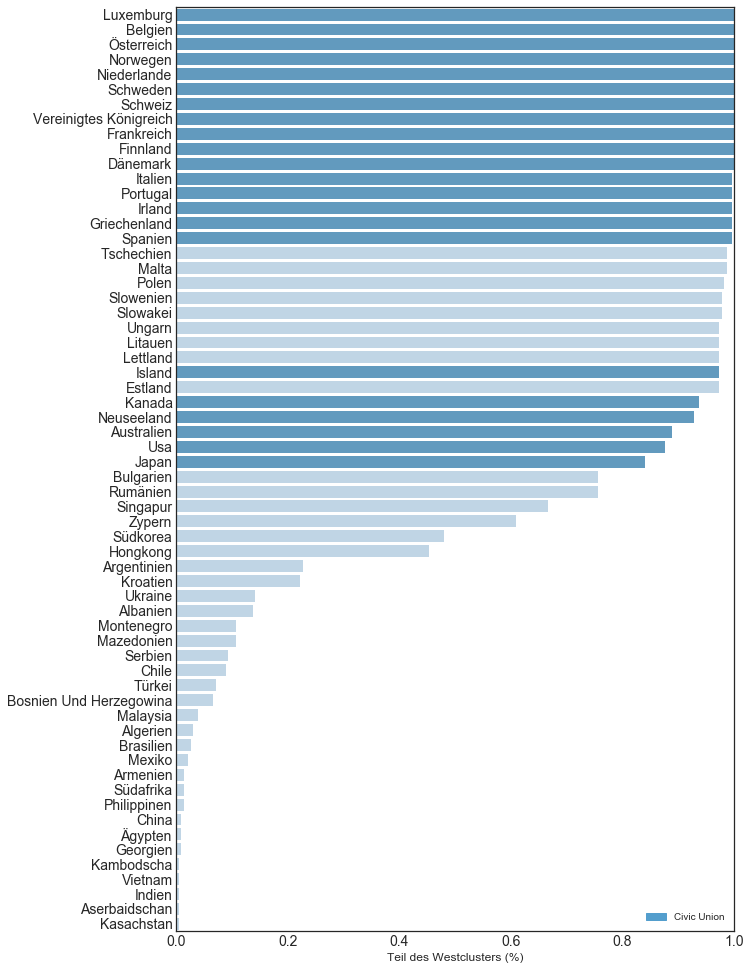

In [44]:
vis_plot = sns.barplot(y="Land", x="Clusterzugehörigkeit_Percentage", 
                       data=percentage_df,
                       palette = [sns.color_palette("Blues")[3] if group == "Civic Union" else sns.color_palette("Blues")[1] for group in percentage_df["West_Cluster"]],
                      )

            
            
#vis_plot = sns.barplot(y="Land", x="Clusterzugehörigkeit_Percentage", 
                       #data=episode_1_df,
                       #color = sns.color_palette("Blues")[3])

        
vis_plot.figure.set_size_inches(10,17)
vis_plot.set_xlabel("Teil des Westclusters (%)",size = 12)
vis_plot.set_ylabel("")
vis_plot.tick_params(labelsize=14)
vis_plot.set_xlim(0,1)
#xmin, xmax = timeline_plot.get_xlim()
#vis_plot.xaxis.label.set_visible(False)
red_patch = mpatches.Patch(color=sns.color_palette("Blues")[3], label='Civic Union')
plt.legend(handles=[red_patch], loc="lower right")


### Abbildung 7

In [45]:
counter_countries = Counter()

west_cluster = civic_union + core_west

for year in range(2012,2014):
    for bootstrap_iteration in range(0,25):
        final_distance = 1
        final_compare_cluster = []
        for cluster_number_compare in cluster_dict[year][bootstrap_iteration]:
            compare_cluster = cluster_dict[year][bootstrap_iteration][cluster_number_compare]
            compare_distance = nltk.jaccard_distance(set(west_cluster), set(compare_cluster))
            if compare_distance < final_distance:
                final_distance =  compare_distance
                final_compare_cluster = compare_cluster
        counter_countries.update(final_compare_cluster)
        
percentage_dict = {country: counter_countries[country] / 50 for country in counter_countries}   
percentage_df = pd.DataFrame.from_dict(percentage_dict, orient="index")
percentage_df.head()

,0
albanien,0.48
belgien,1.00
bosnien_und_herzegowina,0.46
bulgarien,0.98
dänemark,1.00


In [46]:
group_list = []

for index, row in percentage_df.iterrows():
    if index in west_cluster:
        group_list.append("Civic Union")
    else:
        group_list.append("")
        
percentage_df["West_Cluster"] = group_list

In [47]:
percentage_df.index = [  " ".join([country_name.capitalize() for country_name in country.split("_")]) for country in percentage_df.index]
percentage_df.reset_index(inplace=True)
percentage_df.columns = ["Land","Clusterzugehörigkeit_Percentage","West_Cluster"]
percentage_df.sort_values("Clusterzugehörigkeit_Percentage",inplace=True, ascending=False)
percentage_df.head()

,Land,Clusterzugehörigkeit_Percentage,West_Cluster
15,Luxemburg,1.0,Civic Union
26,Schweiz,1.0,Civic Union
20,Norwegen,1.0,Civic Union
31,Tschechien,1.0,
21,Österreich,1.0,Civic Union


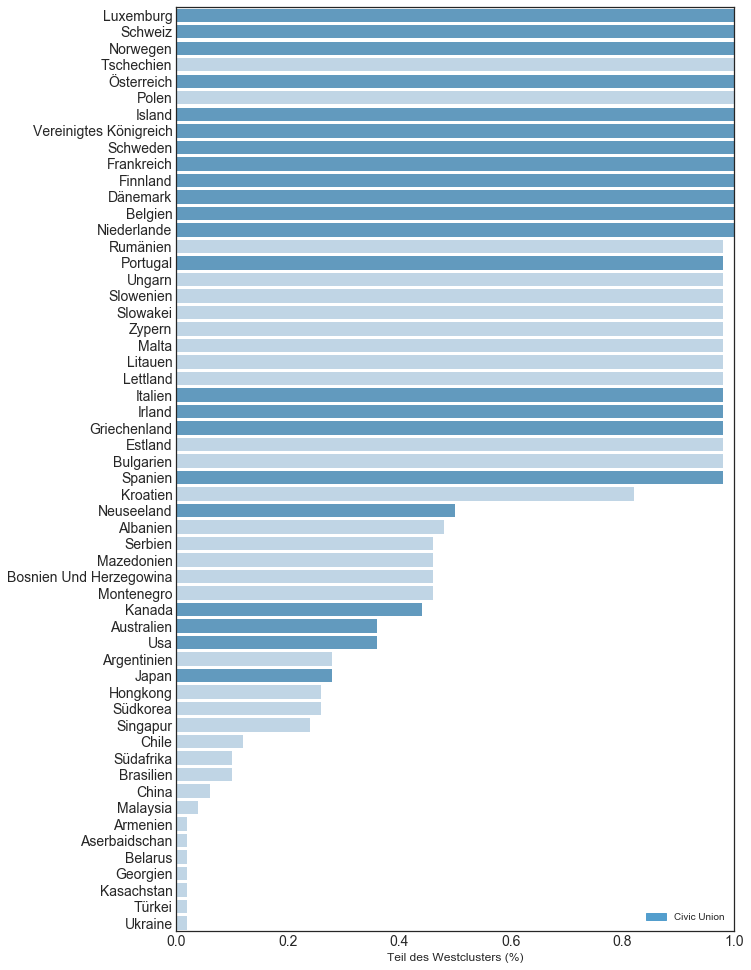

In [48]:
vis_plot = sns.barplot(y="Land", x="Clusterzugehörigkeit_Percentage", 
                       data=percentage_df,
                       palette = [sns.color_palette("Blues")[3] if group == "Civic Union" else sns.color_palette("Blues")[1] for group in percentage_df["West_Cluster"]],
                      )

            
            
#vis_plot = sns.barplot(y="Land", x="Clusterzugehörigkeit_Percentage", 
                       #data=episode_1_df,
                       #color = sns.color_palette("Blues")[3])

        
vis_plot.figure.set_size_inches(10,17)
vis_plot.set_xlabel("Teil des Westclusters (%)",size = 12)
vis_plot.set_ylabel("")
vis_plot.tick_params(labelsize=14)
vis_plot.set_xlim(0,1)
#xmin, xmax = timeline_plot.get_xlim()
#vis_plot.xaxis.label.set_visible(False)
red_patch = mpatches.Patch(color=sns.color_palette("Blues")[3], label='Civic Union')
plt.legend(handles=[red_patch], loc="lower right")


## Abbildung 8-9 - Wortvektoren der Ländernamen (1996-1999 vs. 2013-2016)

In [49]:
import pandas as pd
import umap
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly
import plotly.graph_objs as go

%matplotlib inline
matplotlib.style.use('seaborn-white')

### Abbildung 8

Laden der UN-Regionalgruppen

In [50]:
country_groups_df = pd.read_csv("Country_Groups.csv", sep=";", engine="python", encoding="utf-8", names= ["Land","UN_AfricanGroup","UN_AsiaGroup","UN_EastEUGroup","UN_LatinAmerica","UN_WestEuropeGroup","ArabischeLiga","ASEAN","Benelux","BRICS","G4","G8","G8_5","G20","Next11","OPAC","Mercosur","P5","Visegrad"])
country_groups_df.set_index("Land", inplace=True)
country_groups_df.drop("Land",axis=0,inplace=True)
country_groups_df.head()

,UN_AfricanGroup,UN_AsiaGroup,UN_EastEUGroup,UN_LatinAmerica,UN_WestEuropeGroup,ArabischeLiga,ASEAN,Benelux,BRICS,G4,G8,G8_5,G20,Next11,OPAC,Mercosur,P5,Visegrad
Land,,,,,,,,,,,,,,,,,,
afghanistan,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ägypten,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
albanien,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
algerien,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
andorra,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Laden der Wortvektoren für die zeiträume 1996-1999 und 2013-2016. Als Grundlage dient das "fixedModel", also das Modell, das am originalen, nicht durch bootstrapping veränderten Datensatz trainiert wurde.

In [51]:
vector_1996_df = pd.read_csv(r"Country_Vectors\year1996-1999_fixedModel_CountryVectors.csv")
vector_1996_df.set_index("Country", inplace=True)
vector_2013_df = pd.read_csv(r"Country_Vectors\year2013-2016_fixedModel_CountryVectors.csv")
vector_2013_df.set_index("Country", inplace=True)

Transformation der Vektoren in zwei Dimensionen mittels UMAP.

In [52]:
embedding_1996 = umap.UMAP(random_state=0,metric="cosine").fit_transform(vector_1996_df)
vector_1996_df["X_UMAP"] = list(embedding_1996[:,0])
vector_1996_df["Y_UMAP"] = list(embedding_1996[:,1])

embedding_2013 = umap.UMAP(random_state=0,metric="cosine").fit_transform(vector_2013_df)
vector_2013_df["X_UMAP"] = list(embedding_2013[:,0])
vector_2013_df["Y_UMAP"] = list(embedding_2013[:,1])

Den einzelnen Ländervektoren werden die UN-Regionalgruppen zugeordnet

In [53]:
for column in country_groups_df.columns:
    groups_list = []
    for index, row in vector_1996_df.iterrows():
        country_name = index
        country_name = country_name.replace("_"," ")
        group = country_groups_df[country_groups_df.index == country_name][column].values[0]
        groups_list.append(group)
    vector_1996_df[column] = groups_list
    
    
for column in country_groups_df.columns:
    groups_list = []
    for index, row in vector_2013_df.iterrows():
        country_name = index
        country_name = country_name.replace("_"," ")
        group = country_groups_df[country_groups_df.index == country_name][column].values[0]
        groups_list.append(group)
    vector_2013_df[column] = groups_list

Umlabeln der Regionalgruppen Zugehörigkeit von Ziffern in Text

In [54]:
un_groups = {"UN_AfricanGroup":"Afrika","UN_AsiaGroup":"Asien","UN_EastEUGroup":"Osteuropa","UN_LatinAmerica":"Lateinamerika","UN_WestEuropeGroup":"Westeuropa"}
groups_list = []

for index, row in vector_1996_df.iterrows():
    for group in un_groups:
        if row[group] == 1:
            groups_list.append(un_groups[group])
            
vector_1996_df["UN-Regionalgruppen"] = groups_list

groups_list = []

for index, row in vector_2013_df.iterrows():
    for group in un_groups:
        if row[group] == 1:
            groups_list.append(un_groups[group])
            
vector_2013_df["UN-Regionalgruppen"] = groups_list

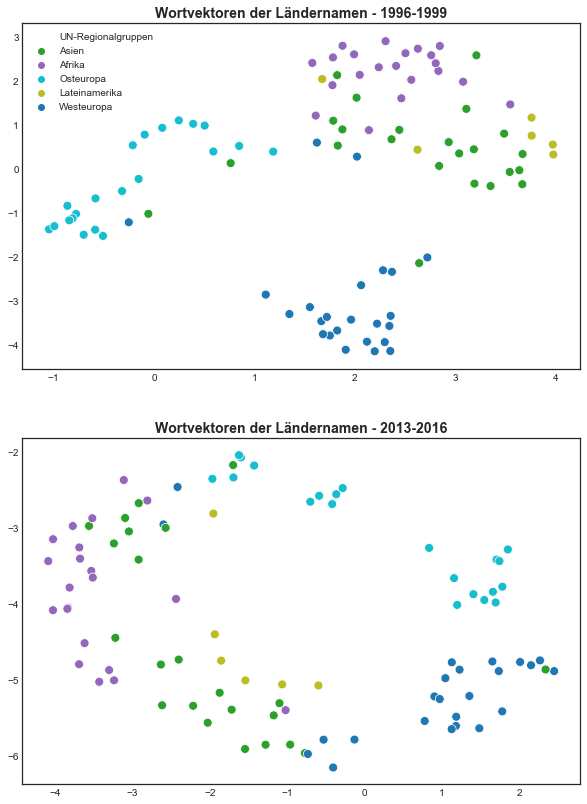

In [55]:
fig, ax = plt.subplots(2,1,sharex=False, sharey=False)


barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="UN-Regionalgruppen", data=vector_1996_df, s=80, 
                           palette = {"Westeuropa":sns.color_palette()[0],
                                      "Osteuropa": sns.color_palette()[9],
                                      "Asien": sns.color_palette()[2],
                                      "Afrika": sns.color_palette()[4],
                                      "Lateinamerika": sns.color_palette()[8]}, ax=ax[0])
barplot.figure.set_size_inches(10,14)
barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Wortvektoren der Ländernamen - 1996-1999", weight="bold", size=14)

barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="UN-Regionalgruppen", data=vector_2013_df, s=80, 
                           palette = {"Westeuropa":sns.color_palette()[0],
                                      "Osteuropa": sns.color_palette()[9],
                                      "Asien": sns.color_palette()[2],
                                      "Afrika": sns.color_palette()[4],
                                      "Lateinamerika": sns.color_palette()[8]},ax=ax[1])


barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Wortvektoren der Ländernamen - 2013-2016", weight="bold", size=14)
barplot.get_legend().set_visible(False)



### Abbildung 9

In [56]:
core_west = ["belgien","dänemark","frankreich","island","italien","kanada","luxemburg",
             "niederlande","norwegen","portugal","spanien","vereinigtes_königreich","usa"]


civic_union = ["japan","finnland","irland","österreich","schweden","schweiz","griechenland"] + ["australien","neuseeland"]

west_cluster = core_west + civic_union

Laden der Wortvektoren für die zeiträume 1996-1999 und 2013-2016. Als Grundlage dient das "fixedModel", also das Modell, das am originalen, nicht durch bootstrapping veränderten Datensatz trainiert wurde.

In [57]:
vector_1996_df = pd.read_csv(r"Country_Vectors\year1996-1999_fixedModel_CountryVectors.csv")
vector_1996_df.set_index("Country", inplace=True)
vector_2013_df = pd.read_csv(r"Country_Vectors\year2013-2016_fixedModel_CountryVectors.csv")
vector_2013_df.set_index("Country", inplace=True)

Transformation der Vektoren in zwei Dimensionen mittels UMAP.

In [58]:
embedding_1996 = umap.UMAP(random_state=0,metric="cosine").fit_transform(vector_1996_df)
vector_1996_df["X_UMAP"] = list(embedding_1996[:,0])
vector_1996_df["Y_UMAP"] = list(embedding_1996[:,1])
embedding_2013 = umap.UMAP(random_state=0,metric="cosine").fit_transform(vector_2013_df)
vector_2013_df["X_UMAP"] = list(embedding_2013[:,0])
vector_2013_df["Y_UMAP"] = list(embedding_2013[:,1])

In [59]:
groups_list = []

for index, row in vector_1996_df.iterrows():
    if index in west_cluster:
        groups_list.append("Civic Union")
    else:
        groups_list.append("")
            
vector_1996_df["West_Cluster"] = groups_list

groups_list = []

for index, row in vector_2013_df.iterrows():
    if index in west_cluster:
        groups_list.append("Civic Union")
    else:
        groups_list.append("")
            
vector_2013_df["West_Cluster"] = groups_list

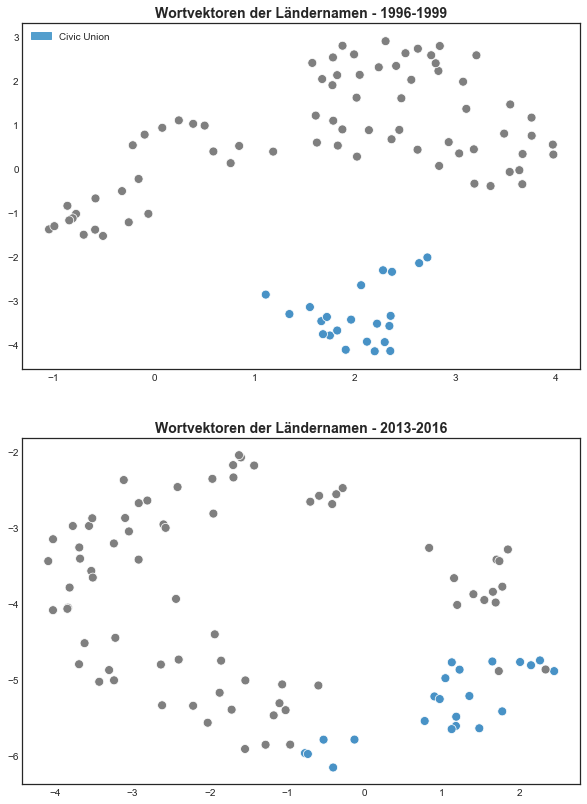

In [60]:
fig, ax = plt.subplots(2,1,sharex=False, sharey=False)



barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="West_Cluster", data=vector_1996_df, s=80, 
                          palette = {"Civic Union":sns.color_palette("Blues_d")[3],
                                       "": sns.color_palette()[7]}, ax=ax[0])
barplot.figure.set_size_inches(10,14)
barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Wortvektoren der Ländernamen - 1996-1999", weight="bold", size=14)
barplot.get_legend().remove()



barplot = sns.scatterplot(x = "X_UMAP", y = "Y_UMAP", hue="West_Cluster", data=vector_2013_df, s=80, 
                          palette = {"Civic Union":sns.color_palette("Blues_d")[3],
                                       "": sns.color_palette()[7]},ax=ax[1])

barplot.yaxis.label.set_visible(False)
barplot.xaxis.label.set_visible(False)
barplot.set_title("Wortvektoren der Ländernamen - 2013-2016", weight="bold", size=14)
barplot.get_legend().remove()

red_patch = mpatches.Patch(color=sns.color_palette("Blues")[3], label='Civic Union')

    
    
ax[0].legend(handles=[red_patch], loc="upper left")